In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
# Load dataset MNIST
mnist = datasets.fetch_openml('mnist_784', as_frame=False, parser='auto')

In [3]:
# Ubah tipe data pixel (gambar) menjadi uint8
data = mnist.data.astype("uint8")

# Ubah tipe data target (label angka) menjadi uint8
target = mnist.target.astype("uint8")

In [4]:
# Ekstraksi fitur HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd, hog_image = hog(image.reshape((28, 28)), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return np.array(hog_features)

In [5]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

In [6]:
X_train.shape

(63000, 784)

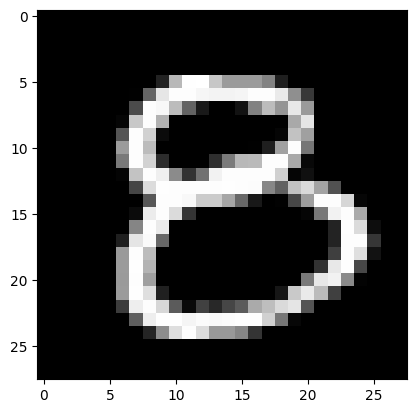

In [7]:
#mencoba  menampilkan gambar dari dataset index ke 0
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [8]:
# Ekstraksi fitur HOG pada data latih dan data uji
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

In [9]:
# Melatih model SVM
svm_model = SVC()
svm_model.fit(X_train_hog, y_train)


SVC()

In [10]:
# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_hog)

In [11]:
# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

In [12]:
# Menampilkan hasil 
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)

Confusion Matrix:
 [[676   1   0   2   0   0   2   0   2   0]
 [  0 793   3   0   1   0   0   1   1   1]
 [  0   1 660   1   3   0   0   3   6   0]
 [  4   1  13 723   0   3   0   3   9   4]
 [  1   1   0   0 593   1   6   4   3   2]
 [  1   1   1   3   0 643   3   0   6   0]
 [  1   1   2   0   2   1 668   0   2   0]
 [  1   2   7   1   6   0   0 696   3   8]
 [  2   2   0  10   2   5   5   4 660   3]
 [  2   1   0   3   7   2   0  10   6 689]]

Accuracy: 0.9715714285714285

Precision: 0.9715714285714285


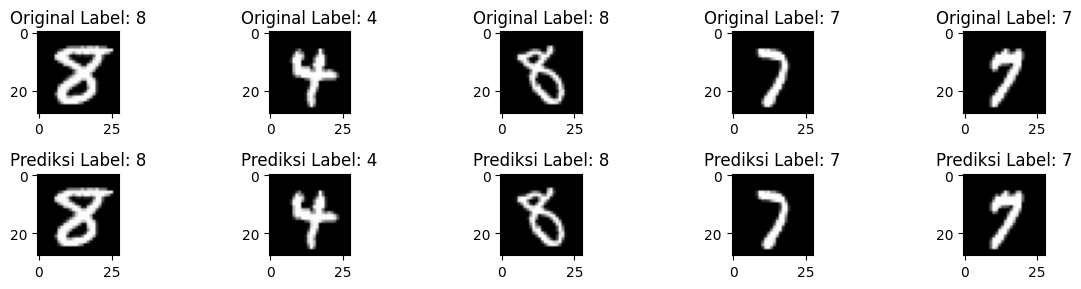

In [13]:
# Menampilkan beberapa gambar tulisan tangan beserta label prediksi
num_images_to_display = 5

plt.figure(figsize=(12, 3))

for i in range(num_images_to_display):
    # Gambar asli
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    plt.title(f'Original Label: {y_test[i]}')

    # Gambar prediksi
    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    plt.title(f'Prediksi Label: {y_pred[i]}')

plt.tight_layout()
plt.show()